## Simple fitting with sasmodels and bumps
The model functions from sasmodels can be used to fit experimental data. This can be done using bumps, which simillar to sasmodels is a separate package and needs to be installed in your path.

## Import sasmodels and bumps

In [1]:
from sasmodels.core import load_model
from sasmodels.bumps_model import Model, Experiment
from sasmodels.data import load_data

from bumps.names import *
from bumps.fitters import fit
from bumps.formatnum import format_uncertainty

import matplotlib.pyplot as plt

## Load the data

In [2]:
test_data = load_data('test_data.txt')

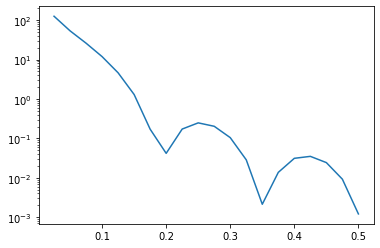

In [3]:
#TODO: Print and plot data 
plt.plot(test_data.x, test_data.y)
plt.yscale('log')

## Setup model

In [4]:
kernel = load_model('cylinder')
pars = dict(radius=35, 
            length=350,
            background=0.0,
            scale=1.0,
            sld=4.0,
            sld_solvent=1.0)
model = Model(kernel, **pars)

# SET THE FITTING PARAMETERS
model.radius.range(1, 50)
model.length.range(1, 500)


Parameter(length)

## Setup Optimizer (Bumps)

In [5]:
M = Experiment(data=test_data, model=model)
problem = FitProblem(M)

## Compute initial model

Initial chisq 421.5501734300949


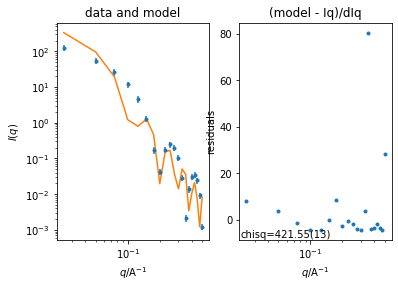

In [6]:
print(f"Initial chisq {problem.chisq()}")
problem.plot()

## Fit model to the data

Final chisq 0.029714823774899965
length : 464.9(55)
radius : 19.977(63)


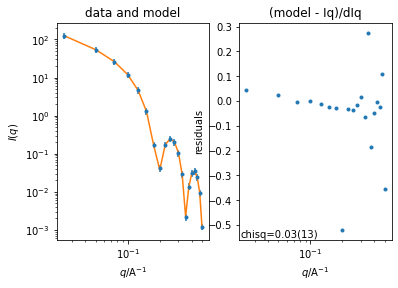

In [7]:
result = fit(problem, method='amoeba')
print(f"Final chisq {problem.chisq()}")
for k, v, dv in zip(problem.labels(), result.x, result.dx):
    print(f"{k} : {format_uncertainty(v, dv)}")
problem.plot()